In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [37]:
def visualize_performance(layer_name, file_name, feat_num):
    df = pd.read_csv(file_name, index_col=0)
    att = df[['rand_num', 'pca_num', 'imp' + str(feat_num), 'train' + str(feat_num), 'test' + str(feat_num)]]
    feat_name = att.loc[0]['imp' + str(feat_num)]
    y_train, y_train_err, y_test, y_test_err = [], [], [], []
    x = np.linspace(150, 300, 16)
    for i in x:
        y_train.append(att[att['pca_num'] == i]['train' + str(feat_num)].mean())
        y_train_err.append(att[att['pca_num'] == i]['train' + str(feat_num)].std())
        y_test.append(att[att['pca_num'] == i]['test' + str(feat_num)].mean())
        y_test_err.append(att[att['pca_num'] == i]['test' + str(feat_num)].std())
    
    max_y_test = round(max(y_test), 2)
    max_y_correspond_x = x[np.argmax(y_test)]
    
    fig_title = '{}-{}-pca{}-test-{}'.format(layer_name, feat_name, max_y_correspond_x, max_y_test)
    
    plt.errorbar(x, y_train, y_train_err, label='train')
    plt.errorbar(x, y_test, y_test_err, label='test')
    plt.grid()
    plt.title(fig_title)
    plt.show()
    plt.savefig('tmp_data/'+fig_title+'.jpg')
    

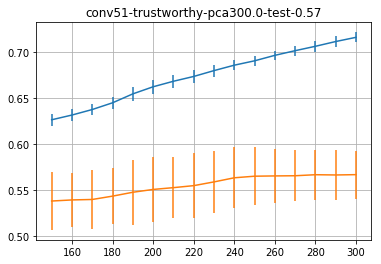

<Figure size 432x288 with 0 Axes>

In [38]:
visualize_performance('conv51', 'tmp_data/conv51_2k_performance_150-300.csv', 1)

In [142]:
vc_funding_data['short_id'].loc[0]

u'vc1'

In [147]:
vc_impression_data['vc_id'].iloc[1]

vc_id    vc10001
Name: vc10001_cb.jpeg, dtype: object